In [29]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mysql.connector import Error, connect
import sqlalchemy

In [86]:
def mse(x, y):
    summation = 0
    n = len(y)
    for i in range(0, n):
        difference = y[i] - x[i]
        squared_difference = difference ** 2
        summation = summation + squared_difference
    return summation / n

#hàm tương quan
def covariance(x,y):
    mean_x = sum(x) / float(len(x))
    mean_y = sum(y) / float(len(y))
    
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    numerator = sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])
    denominator = len(x) - 1
    cov = numerator / denominator
    return cov

#hàm phương sai
def correlation(x, y):
    mean_x = sum(x) / float(len(x))
    mean_y = sum(y) / float(len(y))

    sub_x = [i - mean_x for i in x]

    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])

    std_deviation_x = sum([sub_x[i] ** 2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i] ** 2.0 for i in range(len(sub_y))])

    denominator = (std_deviation_x * std_deviation_y) ** 0.5
    cor = numerator / denominator
    return cor

In [33]:
#Load dữ liệu
df = pd.read_csv('dataset.csv')

X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
y = df['target'].values
X

array([[44.,  1.,  4., ...,  1.,  0.,  3.],
       [48.,  0.,  3., ...,  2.,  1.,  3.],
       [47.,  1.,  4., ...,  2.,  0.,  3.],
       ...,
       [62.,  1.,  3., ...,  1.,  1.,  3.],
       [60.,  1.,  3., ...,  2.,  3.,  7.],
       [39.,  1.,  3., ...,  1.,  0.,  3.]])

In [88]:
#sử dụng StandardScaler xử lý dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

In [89]:
#In ra các features
col_names = list(df.columns)
col_names.remove('target')
col_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [90]:
cov = [covariance(df[name], df['target']) for name in col_names]
corr = [correlation(df[name], df['target']) for name in col_names]

corr_df = pd.DataFrame([col_names, cov, corr]).T
corr_df.columns = ['col', 'cov', 'corr']
corr_df

,col,cov,corr
0,age,-0.933732,-0.1925
1,sex,-0.059651,-0.256453
2,cp,-0.184409,-0.390689
3,trestbps,-1.167041,-0.123362
4,chol,-1.679262,-0.078769
5,fbs,0.005398,0.030526
6,restecg,-0.08668,-0.174844
7,thalach,4.780613,0.400367
8,exang,-0.086294,-0.368824
9,oldpeak,-0.210316,-0.379669


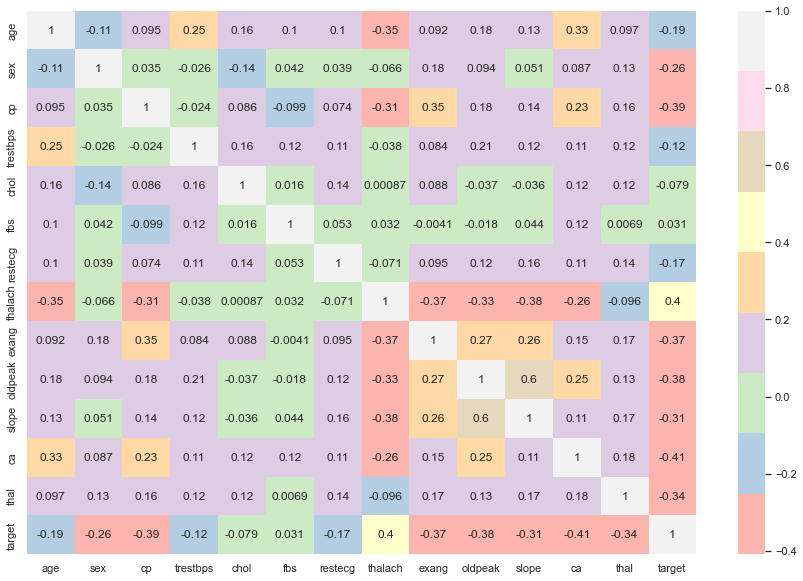

In [37]:
#Bảng corr
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,0:14].corr(), annot=True, cmap="Pastel1")
plt.show()

In [92]:
+#thuật toán SVM
class SVM_classifier():


  # khởi tạo hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  
  # fit dataset với SVM Classifier
  def fit(self, X, Y):

    
    self.m, self.n = X.shape

    
    #khởi tạo trọng số và độ lệch

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # thiết lập thuật toán Gradient Descent để tối ưu hóa

    for i in range(self.no_of_iterations):
      self.update_weights()



  # hàm update trọng số và độ lệch
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  
  # dự đoán label cho một giá trị input
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat  



In [93]:
#Hàm chia tập dữ liệu
import random

def random_split_data(X, y, split_ratio = 0.8):


        #lấy kích thước
        m, n =X.shape

        #random
        random_idx = list(range(m))
        random.shuffle(random_idx)

        #chia
        threshold = int(m*split_ratio)

        train_idx = random_idx[:threshold]
        test_idx = random_idx[threshold:]

        X_train = X[train_idx,:]
        y_train = y[train_idx]
        X_test = X[test_idx,:]
        y_test = y[test_idx]

        return X_train, y_train, X_test, y_test

In [94]:
X_train, y_train, X_test, y_test = random_split_data(X,y)
print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Kích thước tập train: (16848, 13)
Kích thước tập test: (4212, 13)


In [95]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
classifier.fit(X_train, y_train)
X_train_prediction = classifier.predict(X_test)

In [96]:
#Hàm tính độ chính xác
def compute_accuracy(y_test, X_train_prediction):
    correctly_predicted = 0
    for true_label, predicted in zip(y_test, X_train_prediction):
        if true_label == predicted:
            correctly_predicted += 1
    accuracy_score = correctly_predicted / len(y_test)
    return accuracy_score

In [97]:
#In ra độ chính xác mô hình
print(f"Độ chính xác của mô hình: ",compute_accuracy(y_test, X_train_prediction))

Độ chính xác của mô hình:  0.8390313390313391


In [98]:
result = pd.DataFrame({"predict": X_train_prediction,"actual": y_test})
print(result)


      predict  actual
0           1       1
1           1       0
2           1       0
3           0       0
4           0       0
...       ...     ...
4207        1       1
4208        1       1
4209        0       0
4210        1       1
4211        1       1

[4212 rows x 2 columns]


In [99]:
print(pd.crosstab(X_train_prediction, y_test))

col_0     0     1
row_0            
0      1421   213
1       465  2113


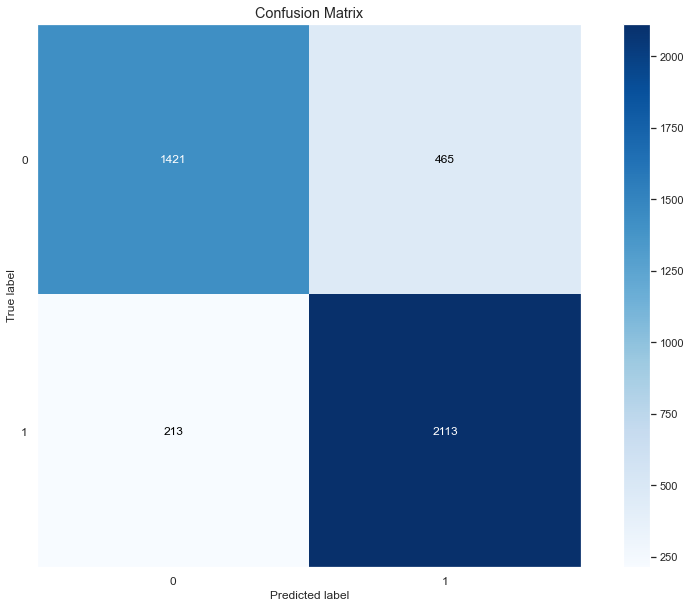

In [100]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test,X_train_prediction,normalize=False)
plt.show()

In [101]:
x = df.drop(columns=['target'])
corr = []

for i in x:
    corr.append({'feature': i, 'corr': correlation(x[i], y)})
corr = pd.DataFrame(data=corr, index=range(len(corr)), columns=['feature', 'corr'])
corr

,feature,corr
0,age,-0.192500
1,sex,-0.256453
2,cp,-0.390689
3,trestbps,-0.123362
4,chol,-0.078769
5,fbs,0.030526
6,restecg,-0.174844
7,thalach,0.400367
8,exang,-0.368824
9,oldpeak,-0.379669


In [30]:
#Tạo database trong mysql

def create_db(host, user, password, database):
    try:
        con = connect(
            host=host,
            user=user,
            password=password,
        )
        cursor = con.cursor()
        cursor.execute("CREATE DATABASE " + database)
    except Error as e:
        print(e)
    finally:
        cursor.close()
        con.close()


#Tạo bảng
def create_tbl(host, user, password, database, table, dataFrame):
    database_connection = sqlalchemy.create_engine(
        'mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(user, password, host, database))
    dataFrame.to_sql(con=database_connection, name=table, if_exists='replace')


# create_db('localhost', 'root', 'locloc11', "btl_iot")
# create_tbl('localhost', 'root', 'locloc11', "btl_iot", "corr_tbl", corr)

create_tbl('localhost', 'root', 'locloc11', "btl_iot", "sklearn", result2)

In [20]:
#thuật toán svm của sklearn để so sánh với thuật toán tự thiết lập
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
pred2 = clf.predict(X_test)

In [26]:
#in điểm chính xác của svm sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.8378442545109211

In [28]:
result2 = pd.DataFrame({"predict": pred2,"actual": y_test})
print(result2)


      predict  actual
0           0       0
1           0       0
2           1       0
3           1       1
4           1       1
...       ...     ...
4207        1       0
4208        0       0
4209        1       1
4210        0       0
4211        1       1

[4212 rows x 2 columns]
